In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras
import keras.backend as K

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 256
num_classes = 10
epochs = 10

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('data train shape: {0}, label train shape: {1}'.format(x_train.shape, y_train.shape))
print('data test shape: {0}, label test shape: {1}'.format(x_test.shape, y_test.shape))

data train shape: (60000, 28, 28, 1), label train shape: (60000,)
data test shape: (10000, 28, 28, 1), label test shape: (10000,)


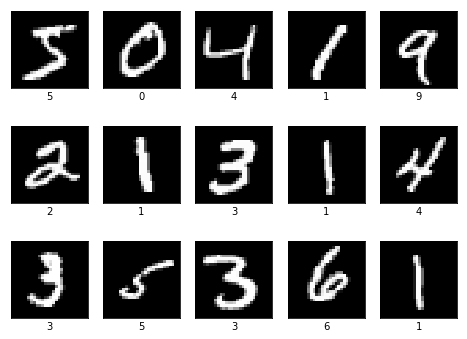

In [0]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_xlabel(y_train[i])
    ax.imshow(x_train[i,:,:,0], cmap='gray')

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [0]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

W0703 08:51:56.980385 139765277398912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 08:51:57.021046 139765277398912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 08:51:57.031537 139765277398912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 08:51:57.244363 139765277398912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0703 08:51:57.287934 139765277398912 deprecation_wrapp

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                102464    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])

W0703 08:52:39.478682 139765277398912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 08:52:39.487646 139765277398912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3
                    )

score = model.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

W0703 08:52:49.489651 139765277398912 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 34s 804us/step - loss: 0.6216 - acc: 0.8060 - val_loss: 0.1284 - val_acc: 0.9610
Epoch 2/10
42000/42000 [==============================] - 33s 795us/step - loss: 0.2018 - acc: 0.9401 - val_loss: 0.0859 - val_acc: 0.9743
Epoch 3/10
42000/42000 [==============================] - 33s 793us/step - loss: 0.1480 - acc: 0.9569 - val_loss: 0.0693 - val_acc: 0.9803
Epoch 4/10
42000/42000 [==============================] - 33s 796us/step - loss: 0.1210 - acc: 0.9645 - val_loss: 0.0591 - val_acc: 0.9819
Epoch 5/10
42000/42000 [==============================] - 33s 792us/step - loss: 0.1075 - acc: 0.9677 - val_loss: 0.0540 - val_acc: 0.9839
Epoch 6/10
42000/42000 [==============================] - 33s 791us/step - loss: 0.0914 - acc: 0.9731 - val_loss: 0.0504 - val_acc: 0.9853
Epoch 7/10
42000/42000 [==============================] - 33s 789us/step - loss: 0.0790 - acc: 0.9763 - val_loss: 0.

In [0]:
def plot_history(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

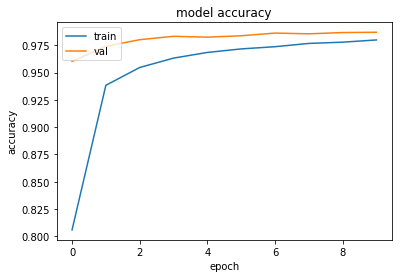

In [0]:
plot_history(history)

[2]


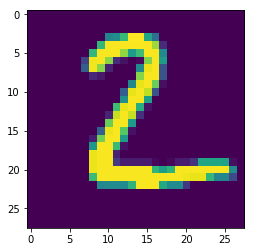

In [0]:
plt.imshow(x_test[1,:,:,0])
pred_class = model.predict_classes(x_test[1].reshape(-1, 28, 28, 1))
print(pred_class)

In [0]:
model.save('my_model.h5')

saved_model = keras.models.load_model('my_model.h5')
pred_class = saved_model.predict_classes(x_test[1].reshape(-1, 28, 28, 1))
print(pred_class)

[2]
